# Convergence testing the 2nd-order acoustic example

In this notebook, Schism's immersed boundary implementation is convergence tested against the previously presented exact solution.

Operator `normals` ran in 0.01 s


Generating stencils for Derivative(p(t, x, y), (x, 2))


/home/ed/anaconda3/envs/devito/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/ed/anaconda3/envs/devito/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


Generating stencils for Derivative(p(t, x, y), (y, 2))


Operator `Kernel` ran in 0.04 s


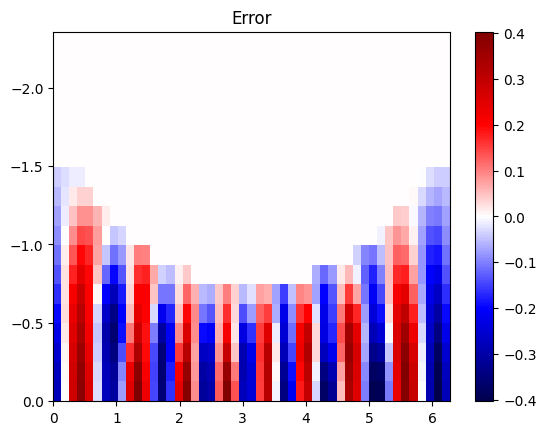

Operator `normals` ran in 0.01 s


Generating stencils for Derivative(p(t, x, y), (x, 2))
Generating stencils for Derivative(p(t, x, y), (y, 2))


Operator `Kernel` ran in 0.11 s


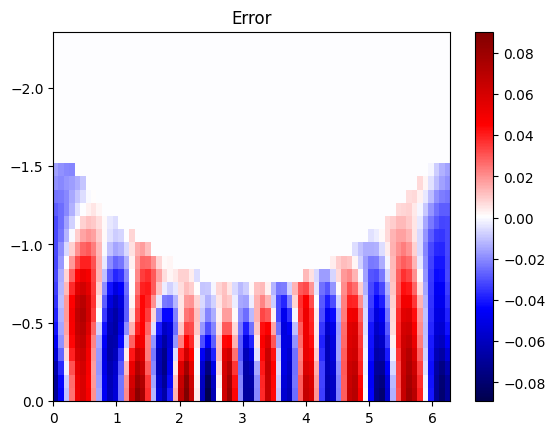

Operator `normals` ran in 0.01 s


Generating stencils for Derivative(p(t, x, y), (x, 2))
Generating stencils for Derivative(p(t, x, y), (y, 2))


Operator `Kernel` ran in 0.27 s


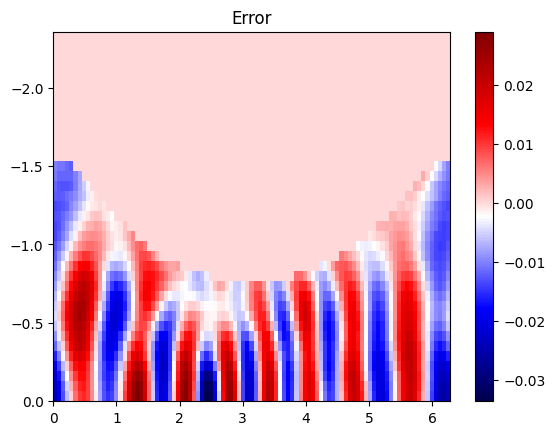

Operator `normals` ran in 0.01 s


Generating stencils for Derivative(p(t, x, y), (x, 2))
Generating stencils for Derivative(p(t, x, y), (y, 2))


Operator `Kernel` ran in 0.50 s


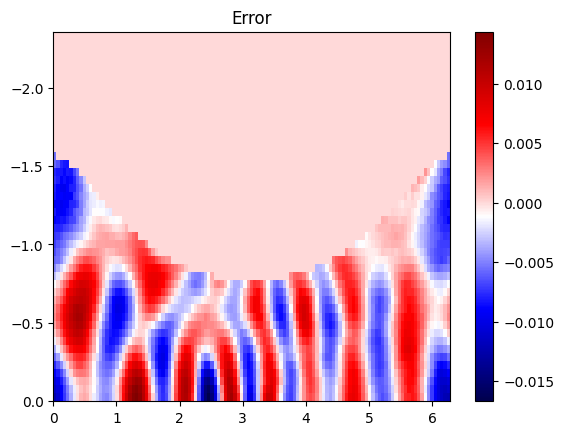

Operator `normals` ran in 0.01 s


Generating stencils for Derivative(p(t, x, y), (x, 2))
Generating stencils for Derivative(p(t, x, y), (y, 2))


Operator `Kernel` ran in 0.74 s


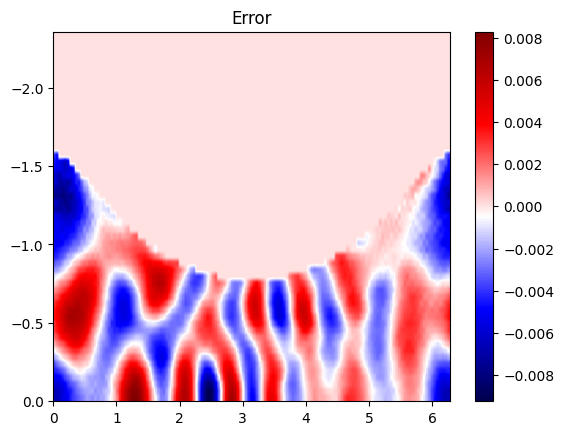

Operator `normals` ran in 0.01 s


Generating stencils for Derivative(p(t, x, y), (x, 2))
Generating stencils for Derivative(p(t, x, y), (y, 2))


Operator `Kernel` ran in 1.49 s


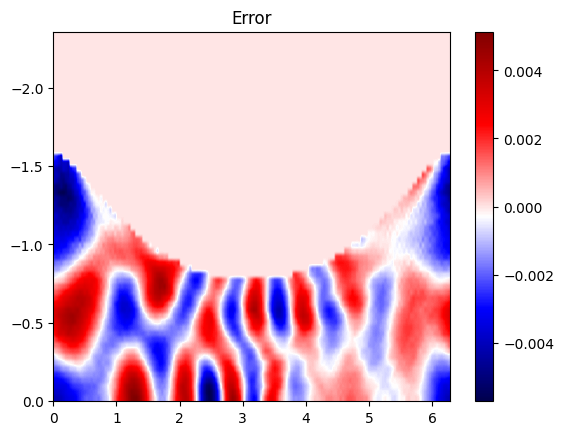

Operator `normals` ran in 0.01 s


Generating stencils for Derivative(p(t, x, y), (x, 2))
Generating stencils for Derivative(p(t, x, y), (y, 2))


Operator `Kernel` ran in 2.87 s


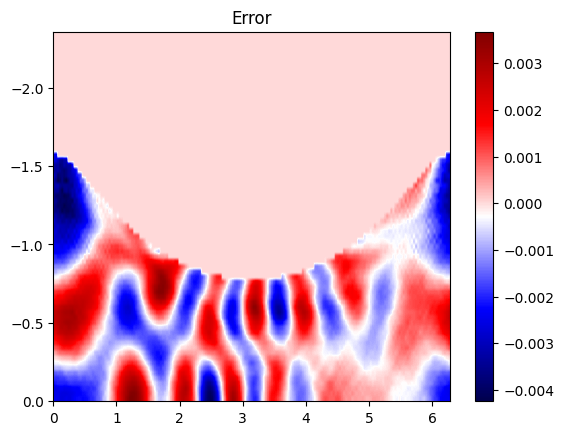

Operator `normals` ran in 0.01 s


Generating stencils for Derivative(p(t, x, y), (x, 2))
Generating stencils for Derivative(p(t, x, y), (y, 2))


Operator `Kernel` ran in 4.25 s


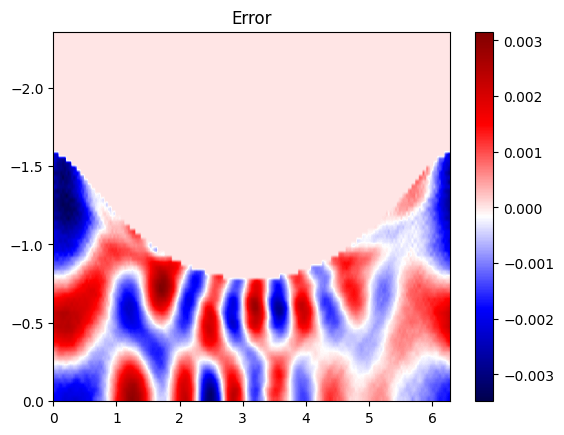

Operator `normals` ran in 0.01 s


Generating stencils for Derivative(p(t, x, y), (x, 2))
Generating stencils for Derivative(p(t, x, y), (y, 2))


Operator `Kernel` ran in 5.94 s


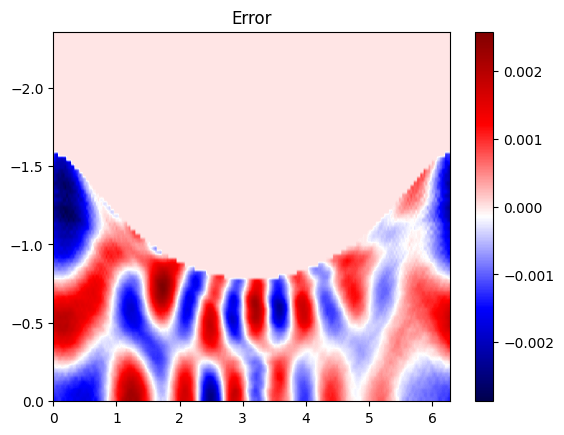

Operator `normals` ran in 0.01 s


Generating stencils for Derivative(p(t, x, y), (x, 2))
Generating stencils for Derivative(p(t, x, y), (y, 2))


Operator `Kernel` ran in 13.42 s


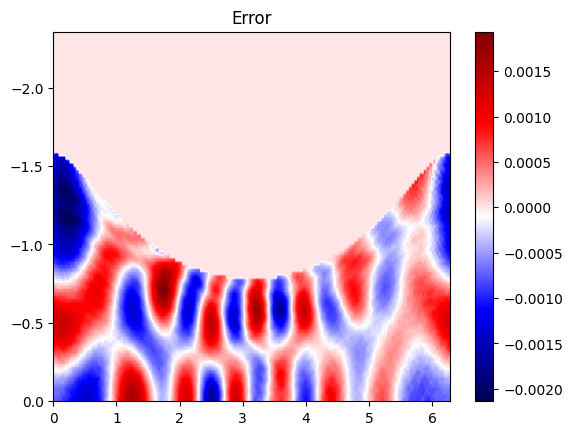

Operator `normals` ran in 0.01 s


Generating stencils for Derivative(p(t, x, y), (x, 2))
Generating stencils for Derivative(p(t, x, y), (y, 2))


Operator `Kernel` ran in 30.94 s


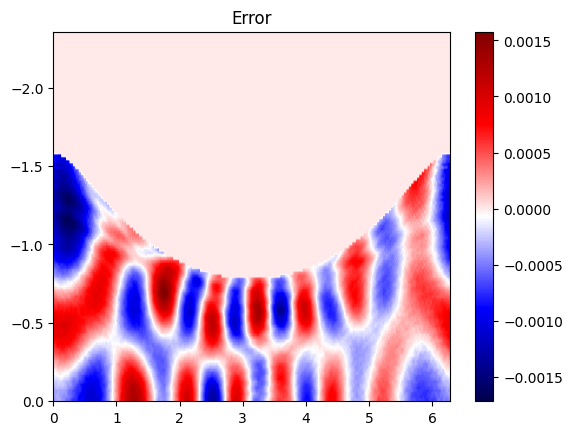

In [1]:
from convergence import calculate_error

refinements = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.4]
errs_max = []

for refinement in refinements:
    max_err = calculate_error(refinement)
    errs_max.append(max_err)

Plotting the convergence, a similar trend to that reported for Mulder's scheme is observed, with an approximately fourth-order trend, flattening at a grid increment of around $\Delta x = 0.02$, after which the order of convergence drops off somewhat.

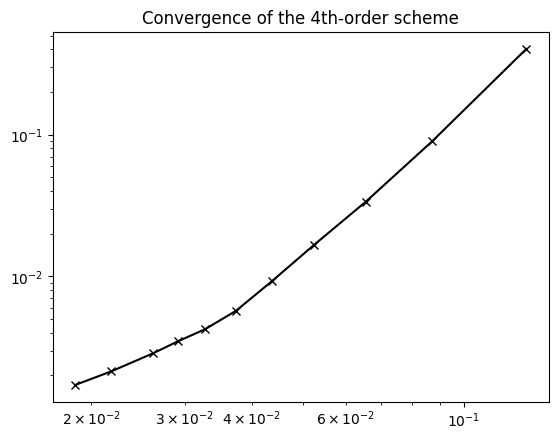

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.loglog(2*np.pi/(240*np.array(refinements)), errs_max, 'kx')
plt.loglog(2*np.pi/(240*np.array(refinements)), errs_max, 'k')
plt.title("Convergence of the 4th-order scheme")
plt.show()

Finding the convergence gradient before the knee, we see that the scheme attains just short of 4th-order.

In [3]:
grad_upper = np.polyfit(np.log10(2*np.pi/(240*np.array(refinements[:5]))),
                        np.log10(errs_max[:5]), 1)[0]
assert np.isclose(grad_upper, 3.4309910429370785)

In [4]:
grad_lower = np.polyfit(np.log10(2*np.pi/(240*np.array(refinements[5:]))),
                        np.log10(errs_max[5:]), 1)[0]
assert np.isclose(grad_lower, 1.7202625325567185)

Operator `normals` ran in 0.01 s


Generating stencils for Derivative(p(t, x, y), (x, 2))
Generating stencils for Derivative(p(t, x, y), (y, 2))


Operator `Kernel` ran in 0.02 s


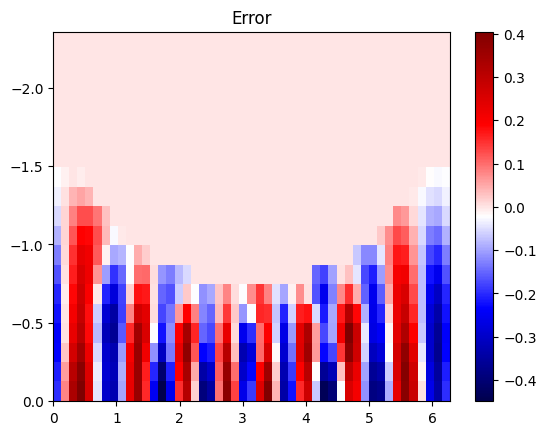

Operator `normals` ran in 0.01 s


Generating stencils for Derivative(p(t, x, y), (x, 2))
Generating stencils for Derivative(p(t, x, y), (y, 2))


Operator `Kernel` ran in 0.03 s


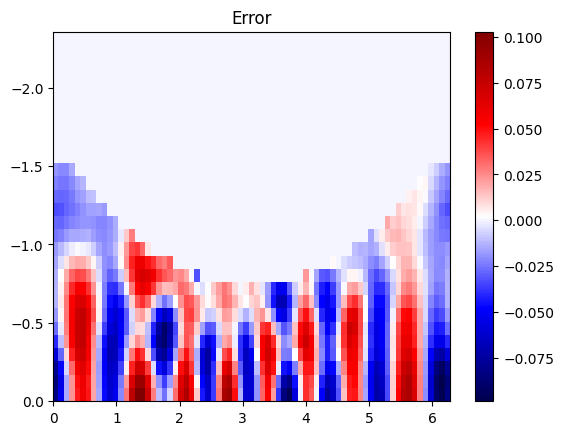

Operator `normals` ran in 0.01 s


Generating stencils for Derivative(p(t, x, y), (x, 2))
Generating stencils for Derivative(p(t, x, y), (y, 2))


Operator `Kernel` ran in 0.05 s


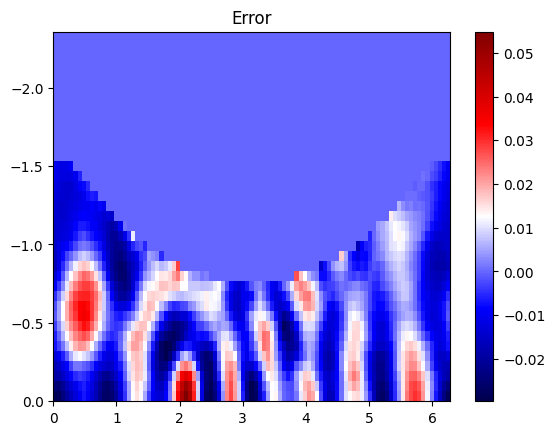

Operator `normals` ran in 0.01 s


Generating stencils for Derivative(p(t, x, y), (x, 2))
Generating stencils for Derivative(p(t, x, y), (y, 2))


Operator `Kernel` ran in 0.09 s


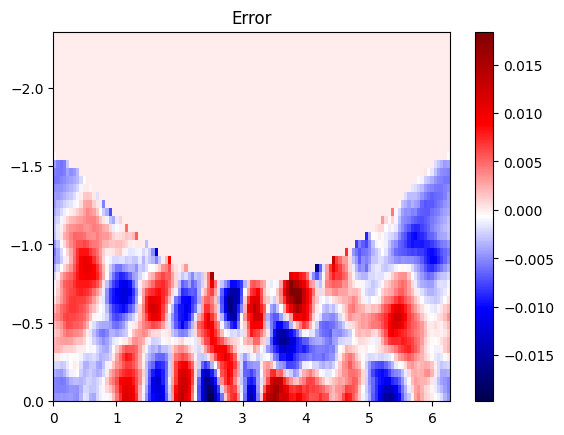

Operator `normals` ran in 0.01 s


Generating stencils for Derivative(p(t, x, y), (x, 2))
Generating stencils for Derivative(p(t, x, y), (y, 2))


Operator `Kernel` ran in 0.14 s


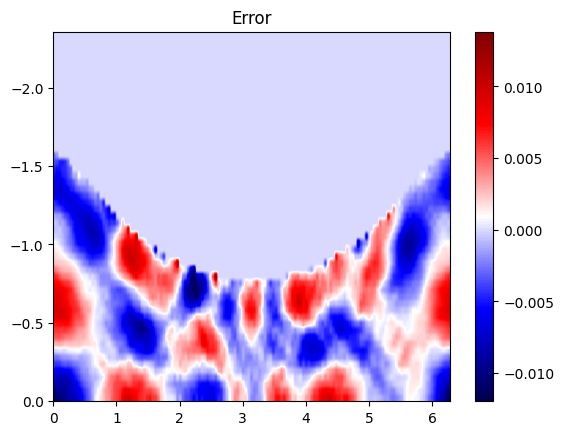

Operator `normals` ran in 0.01 s


Generating stencils for Derivative(p(t, x, y), (x, 2))
Generating stencils for Derivative(p(t, x, y), (y, 2))


Operator `Kernel` ran in 0.48 s


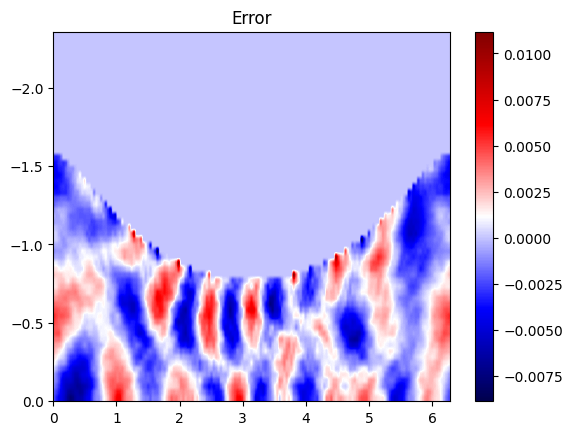

Operator `normals` ran in 0.01 s


Generating stencils for Derivative(p(t, x, y), (x, 2))
Generating stencils for Derivative(p(t, x, y), (y, 2))


Operator `Kernel` ran in 0.67 s


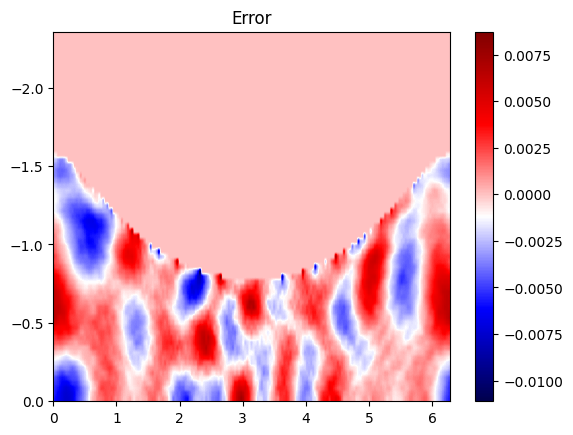

Operator `normals` ran in 0.01 s


Generating stencils for Derivative(p(t, x, y), (x, 2))
Generating stencils for Derivative(p(t, x, y), (y, 2))


Operator `Kernel` ran in 0.44 s


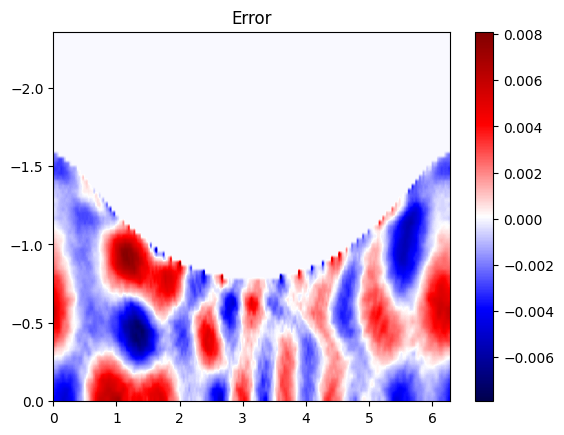

Operator `normals` ran in 0.01 s


Generating stencils for Derivative(p(t, x, y), (x, 2))
Generating stencils for Derivative(p(t, x, y), (y, 2))


Operator `Kernel` ran in 0.61 s


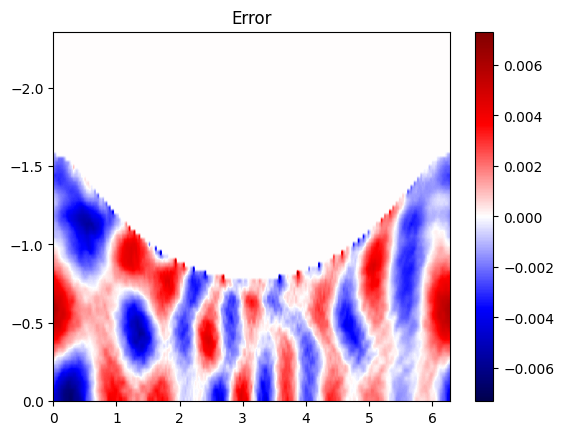

Operator `normals` ran in 0.01 s


Generating stencils for Derivative(p(t, x, y), (x, 2))
Generating stencils for Derivative(p(t, x, y), (y, 2))


Operator `Kernel` ran in 1.33 s


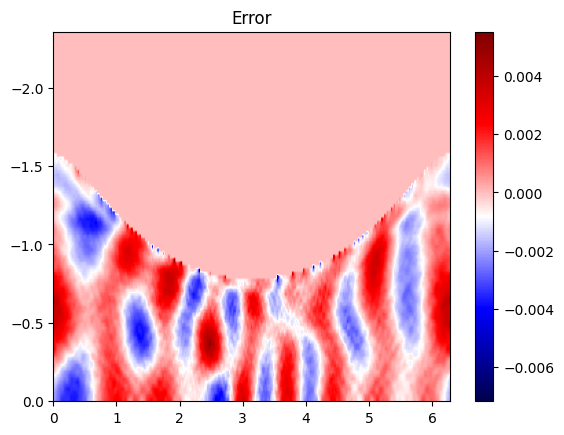

Operator `normals` ran in 0.01 s


Generating stencils for Derivative(p(t, x, y), (x, 2))
Generating stencils for Derivative(p(t, x, y), (y, 2))


Operator `Kernel` ran in 1.59 s


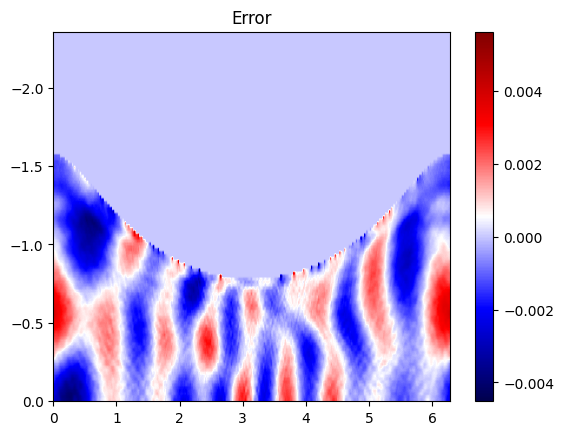

In [5]:
errs_max_1d = []

for refinement in refinements:
    max_err = calculate_error(refinement, has_1D_basis=True)
    errs_max_1d.append(max_err)

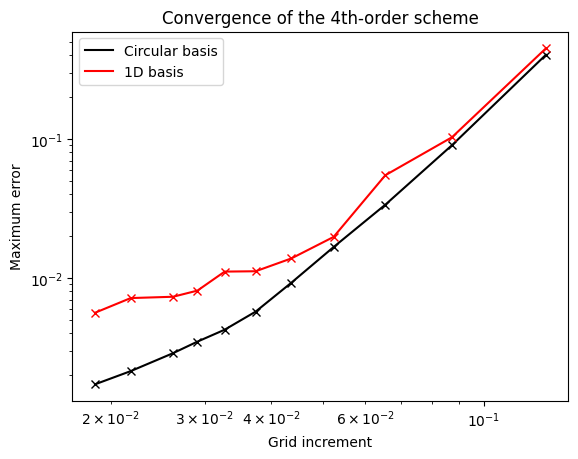

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.loglog(2*np.pi/(240*np.array(refinements)), errs_max, 'kx')
plt.loglog(2*np.pi/(240*np.array(refinements)), errs_max, 'k', label='Circular basis')
plt.loglog(2*np.pi/(240*np.array(refinements)), errs_max_1d, 'rx')
plt.loglog(2*np.pi/(240*np.array(refinements)), errs_max_1d, 'r', label='1D basis')
plt.legend()
plt.title("Convergence of the 4th-order scheme")
plt.xlabel("Grid increment")
plt.ylabel("Maximum error")
plt.savefig("convergence_plot")
plt.show()